In [1]:
# Importando bibliotecas

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o conjunto de dados e visualizando as principais informações

In [17]:
# Importando a base de dados
df = pd.read_csv("agricultural_raw_material.csv")

# Visualizando as primeiras linhas
df.head(15)

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%
5,Sep-90,412.18,-1.50%,196,-1.01%,1.79,0.00%,936.77,-1.52%,185.33,...,384.92,5.57%,0.90,2.27%,129.78,0.06%,199.59,-4.18%,811.62,-0.87%
6,Oct-90,394.64,-4.26%,198,1.02%,1.79,0.00%,901.85,-3.73%,189.76,...,409.31,6.34%,0.90,0.00%,121.31,-6.53%,206.98,3.70%,807.46,-0.51%
7,Nov-90,334.5,-15.24%,236,19.19%,1.82,1.68%,888.61,-1.47%,179.02,...,375.74,-8.20%,0.90,0.00%,130.50,7.58%,206.64,-0.16%,773.37,-4.22%
8,Dec-90,328.24,-1.87%,237,0.42%,1.85,1.65%,870.55,-2.03%,171.13,...,363.16,-3.35%,0.88,-2.22%,119.35,-8.54%,198.22,-4.07%,741.29,-4.15%
9,Jan-91,319.47,-2.67%,233,-1.69%,1.85,0.00%,887.41,1.94%,169.19,...,362.26,-0.25%,0.87,-1.14%,126.14,5.69%,186.94,-5.69%,721.85,-2.62%


In [3]:
# Visualizando as informações do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [4]:
# Verificando se há registros nulos na base de dados
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

# Tratando os dados ausentes, inválidos e incorretos

In [5]:
# Substituindo dados que estiverem preenchidos com '%', ',' e '-' para '' (vazio)

df = df.replace("%", "", regex= True) # Trocando '%' para vazio
df = df.replace(",", "", regex= True) # Trocando ',' para vazio
df = df.replace("-", "", regex= True) # Trocando '-' para vazio
df = df.replace("", np.nan) # Trocando os valores vazios para NULO (NaN)
df = df.replace("MAY90", np.nan) # Trocando valores de 'MAY90' para NULO (NaN)

# Retirando todos os valores nulos do df
df = df.dropna()

# Verificanco se há valores vazios
df.isnull().sum() # não há, conforme o esperado
 


Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

In [6]:
# Verificando os tipos de dados presentes nas colunas

df.dtypes 
# notado que há diversas colunas com tipagem 'object' que devem ser convertidas para float
# motivo: são valores monetários e percentuais (preço da matéria prima e % de variação)

Month                            object
Coarse wool Price                object
Coarse wool price % Change       object
Copra Price                      object
Copra price % Change             object
Cotton Price                    float64
Cotton price % Change            object
Fine wool Price                  object
Fine wool price % Change         object
Hard log Price                  float64
Hard log price % Change          object
Hard sawnwood Price             float64
Hard sawnwood price % Change     object
Hide Price                      float64
Hide price % change              object
Plywood Price                   float64
Plywood price % Change           object
Rubber Price                    float64
Rubber price % Change            object
Softlog Price                   float64
Softlog price % Change           object
Soft sawnwood Price             float64
Soft sawnwood price % Change     object
Wood pulp Price                 float64
Wood pulp price % Change         object


In [7]:
# Alterando o tipo de dados das colunas para float
colunas_object = []

# Loop for para armazenar colunas com tipagem 'object'
for coluna in df.columns:
    
    if df[coluna].dtype == 'object':
        colunas_object.append(coluna)

print(colunas_object) # é preciso remover a coluna dos meses, essa deve ser mantida como 'object'

colunas_object.remove('Month')
print(colunas_object)

# realizando a conversão das colunas para 'float'
df[colunas_object] = df[colunas_object].astype('float')
df.dtypes

['Month', 'Coarse wool Price', 'Coarse wool price % Change', 'Copra Price', 'Copra price % Change', 'Cotton price % Change', 'Fine wool Price', 'Fine wool price % Change', 'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change', 'Rubber price % Change', 'Softlog price % Change', 'Soft sawnwood price % Change', 'Wood pulp price % Change']
['Coarse wool Price', 'Coarse wool price % Change', 'Copra Price', 'Copra price % Change', 'Cotton price % Change', 'Fine wool Price', 'Fine wool price % Change', 'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change', 'Rubber price % Change', 'Softlog price % Change', 'Soft sawnwood price % Change', 'Wood pulp price % Change']


Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


# Formatando a coluna 'Month' para o formato correto

In [8]:
df.head()

# notar que a coluna de meses não está com formatação adequada, necessitando uma formatação

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


In [ ]:
# Formatando a coluna 'Month' como Data (ano - mês - dia)
df.Month = pd.to_datetime(df.Month.str.upper(), 
                          format = '%b%y', 
                          yearfirst=False)


# transformando a coluna de meses no índice da nossa base de dados
# -> ela deixa de ser uma coluna (comparar o .head() de cima e o de baixo)
df = df.set_index("Month")

In [ ]:
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


# Análise Exploratória e Visualização

In [11]:
# Loop for para separar as colunas que contêm preços das colunas com percentuais de variação

colunas_precos = []
colunas_percentil = []

for coluna in df.columns:

    if '%' in coluna:
        colunas_percentil.append(coluna)
    else:
        colunas_precos.append(coluna)

print(colunas_precos)
print(colunas_percentil)

['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price', 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
['Coarse wool price % Change', 'Copra price % Change', 'Cotton price % Change', 'Fine wool price % Change', 'Hard log price % Change', 'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change', 'Rubber price % Change', 'Softlog price % Change', 'Soft sawnwood price % Change', 'Wood pulp price % Change']


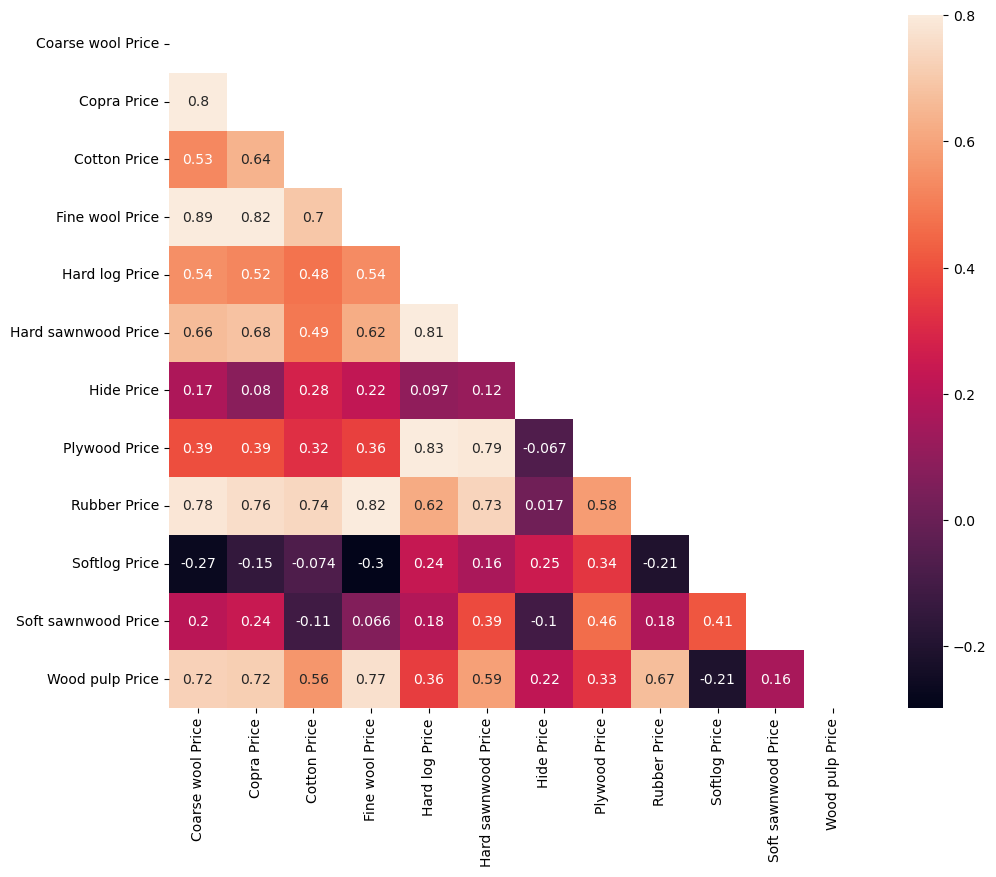

In [ ]:
# Mapa de calor dos PREÇOS das matérias primas

# Matriz de correlação dos preços das matérias primas
corrmat = df[colunas_precos].corr()

# Criação do gráfico
fig = plt.figure(figsize=(12,9)) # tamanho da figura a ser plotada

# mascarando a parte superior do triangulo, já que a matriz é simétrica
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8, mask=mask, square=True, annot=True)
plt.show()

O mapa de calor mostra a correlação entre as matérias-primas. Quanto Maior o valor correlacionado (mais próximo de 1), maiores são as **CHANCES** de serem duas matérias-primas relacionadas. 

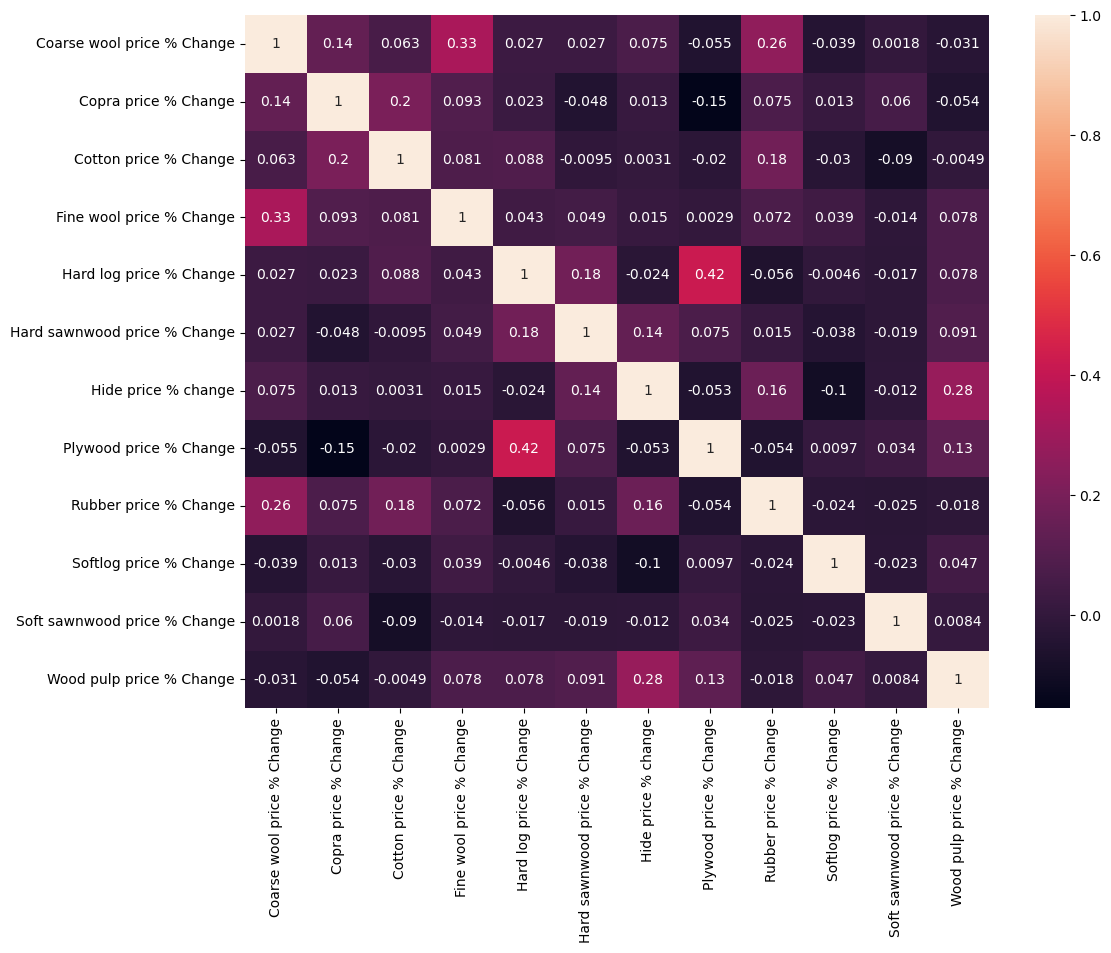

In [ ]:
# Mapa de calor dos Percentuais de Variação

fig = plt.figure(figsize=(12,9)) # tamanho da figura a ser plotada

# Gera uma matriz de correlação para todo o dataset
corrMatriz = df[colunas_percentil].corr()
sns.heatmap(corrMatriz, annot=True)
plt.show()

A partir deste gráfico podemos dizer que quase não há relação entre a variação percentual dos preços das matérias-prima

 - O valor negativo implica que duas variáveis estão negativamente correlacionadas (uma aumenta enquanto a outra diminui)
  - Zero implica nenhuma correlação
  - Caso contrário, maior o valor, maior a chance de relação preços e seus gráficos e % de mudança